In [10]:

# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:

# Load dataset (make sure 'synthetic_sales_60000.csv' is uploaded in same folder)
csv_path = "synthetic_sales_60000.csv"
df = pd.read_csv(csv_path)
print("Loaded file:", csv_path)


Loaded file: synthetic_sales_60000.csv


In [12]:

# Convert Date to datetime with explicit format and safe error handling
# The dataset's Date format is like '24-04-2024 18:05' => '%d-%m-%Y %H:%M'
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M', dayfirst=True, errors='coerce')
# Create Month period for grouping (Year-Month)
df['Month'] = df['Date'].dt.to_period('M')
print("Date parsing done. Example:"); display(df['Date'].head())


Date parsing done. Example:


0   2024-04-24 18:05:00
1   2024-02-11 07:52:00
2   2024-09-28 03:55:00
3   2024-09-06 05:33:00
4   2024-02-09 17:15:00
Name: Date, dtype: datetime64[ns]

In [13]:

# Quick checks
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nTop 5 rows:")
display(df.head())


Shape: (60000, 7)

Data types:
 Date        datetime64[ns]
Product             object
Category            object
Region              object
Units                int64
Revenue              int64
Month            period[M]
dtype: object

Missing values:
 Date        0
Product     0
Category    0
Region      0
Units       0
Revenue     0
Month       0
dtype: int64

Top 5 rows:


,Date,Product,Category,Region,Units,Revenue,Month
0,2024-04-24 18:05:00,Watch,Electronics,South,5,50406,2024-04
1,2024-02-11 07:52:00,Watch,Apparel,North,7,79572,2024-02
2,2024-09-28 03:55:00,Watch,Apparel,West,8,98193,2024-09
3,2024-09-06 05:33:00,Shoes,Apparel,North,13,26629,2024-09
4,2024-02-09 17:15:00,Shoes,Apparel,West,6,13131,2024-02


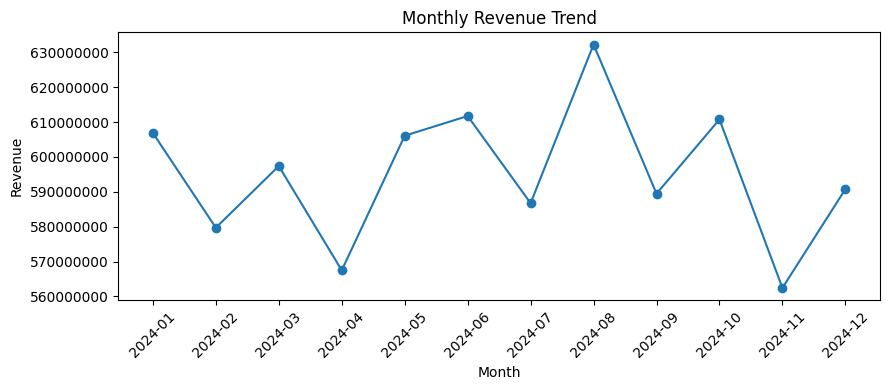

In [14]:

# Monthly revenue trend (clean, readable)
monthly = df.groupby(df['Month'].astype(str))['Revenue'].sum()

plt.figure(figsize=(9,4))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')   # prevents scientific format
plt.tight_layout()
plt.show()


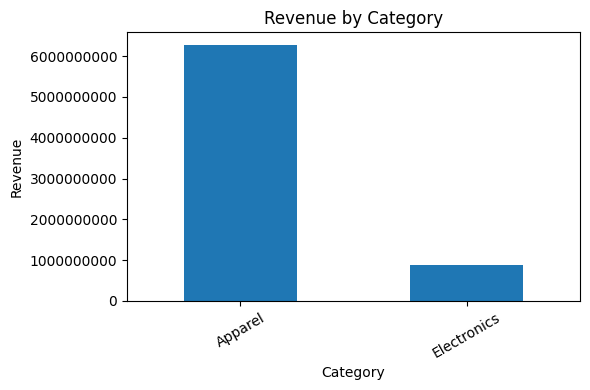


Revenue percent by category:
 Category
Apparel        87.84
Electronics    12.16
Name: Revenue, dtype: float64


In [15]:

# Revenue by Category (sorted)
cat_rev = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
cat_rev.plot(kind='bar')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Print percentage (helpful for demo)
pct = (cat_rev / cat_rev.sum() * 100).round(2)
print("\nRevenue percent by category:\n", pct)


In [16]:

# Top 5 products by total revenue
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 products by total revenue:")
print(top_products)


Top 5 products by total revenue:
Product
Phone     4500666411
Laptop    1208957802
Watch      906648397
Shoes      525391206
Name: Revenue, dtype: int64


In [17]:

def run_quick_demo():
    display(df.head())
    print("\nShape:", df.shape)
    print("\nMissing values:\n", df.isnull().sum())

    # Monthly
    monthly = df.groupby(df['Month'].astype(str))['Revenue'].sum()
    plt.figure(figsize=(9,4))
    plt.plot(monthly.index, monthly.values, marker='o')
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month"); plt.ylabel("Revenue")
    plt.xticks(rotation=45); plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout(); plt.show()

    # Category
    cat_rev = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
    plt.figure(figsize=(6,4)); cat_rev.plot(kind='bar')
    plt.title("Revenue by Category"); plt.xticks(rotation=30); plt.ticklabel_format(style='plain', axis='y')
    plt.tight_layout(); plt.show()

    # Top products
    print("\nTop 5 products by revenue:\n", df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5))

# Run demo (uncomment to run quickly)
# run_quick_demo()
